## Vehicle Detection and Tracking

Here we will apply pre-trained car vs not-car SVM classifier in a sliding window fashion on image pyramids to detect car in the scene.

In [1]:
import glob
import os
import numpy as np
from scipy.ndimage.measurements import label
from skimage.feature import hog
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imp import reload

# To display pd.DataFrames beautifully
from IPython.display import display, HTML

# display plot in the notebook
%matplotlib inline

# reload car_finder
import car_finder
reload(car_finder); from car_finder import CarFinder

### Configurations

In [2]:
# Configurations - Tweak these parameters to fine tune results.
color_space = 'YCrCb'  # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
hog_channel = 'ALL'  # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32)  # Spatial binning dimensions
hist_bins = 32  # Number of histogram bins
spatial_feat = True  # Spatial features on or off
hist_feat = True  # Histogram features on or off
hog_feat = True  # HOG features on or off

### Artifacts Folder

In [3]:
# artifacts folder
GEN_FOLDER = '../gen'
if not os.path.exists(GEN_FOLDER):
    os.makedirs(GEN_FOLDER)
    print("artifacts folder '{}' created".format(GEN_FOLDER))
else:
    print("artifacts folder '{}' already exists".format(GEN_FOLDER))


artifacts folder '../gen' already exists


### Load Model

In [4]:
# load svm classifiers
svc = joblib.load(GEN_FOLDER + '/svc.pkl') 
X_scaler = joblib.load(GEN_FOLDER + '/x_scaler.pkl') 

print(svc, '\n')
print(X_scaler, '\n')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) 

StandardScaler(copy=True, with_mean=True, with_std=True) 



### Test Image

- Sliding Windows
- Detections
- Heatmap
- Contours
- Process Video
- Visualization

### Sliding Windows

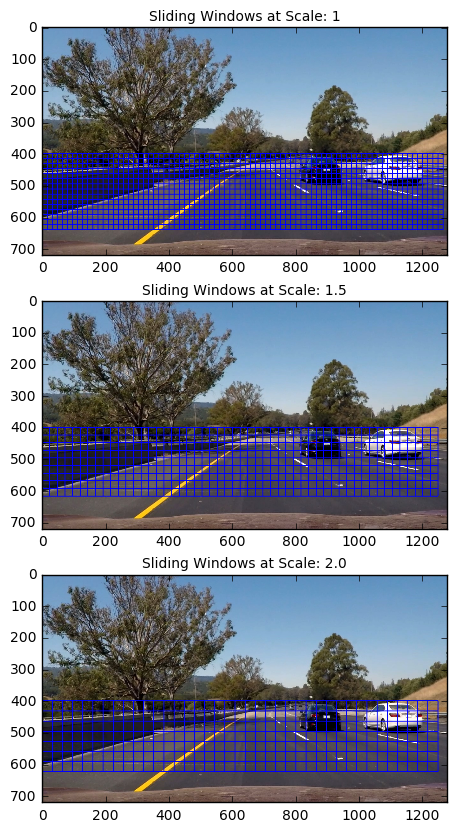

In [5]:
car_finder = CarFinder()

ystart = 400
ystop = 656
scales = [1, 1.5, 2.0]

test_fn = '../test_images/test6.jpg'
img = mpimg.imread(test_fn)

img_num = 1
plt.figure(figsize=(10, 10))

for scale in scales:
    out_img, bbox_list = car_finder.scan_image_pyramid(img, ystart, ystop, 0, img.shape[1], 
                           scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, 
                           spatial_size, hist_bins, vis=True)
    plt.subplot(len(scales), 1, img_num)   
    img_num += 1
    plt.imshow(out_img)
    plt.title("Sliding Windows at Scale: {}".format(scale), fontsize=10)

### Detections

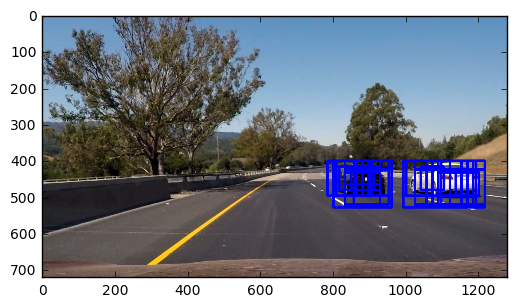

In [6]:
out_img, bbox_list = car_finder.predict_bboxes(img, ystart, ystop, scales, svc, X_scaler, 
                       orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, vis=True)
_ = plt.imshow(out_img)

### Heatmap

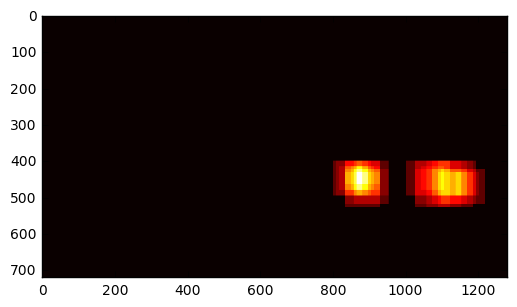

In [7]:
heatmap = car_finder.predict_heatmap(img, bbox_list)
_ = plt.imshow(heatmap, cmap='hot')

### Contours

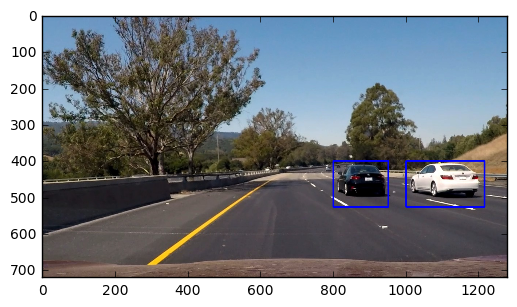

In [8]:
# Find final boxes from heatmap using label function
draw_img = car_finder.predict_contours(img, heatmap)
_ = plt.imshow(draw_img)

### Process Video

In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip

car_finder = CarFinder()
input_video = 'videos/challenge_video.mp4'
output_video = input_video[:-4] + '_processed.mp4'

video_clip = VideoFileClip(input_video)
processed_clip = video_clip.fl_image(lambda frame: car_finder.find_cars(frame, ystart, ystop, scales, svc, X_scaler, 
                       orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

# save video
processed_clip.write_videofile(output_video, audio=False)  
print('Done')

### Visualize movie

In [ ]:
from IPython.display import HTML

print(output_video)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))